# Partitionnez vos données - Le chat - Enoncé

# 1 Preliminary

## 1.1 Context

Ce TP est en lien avec l'activité [Partitionnez vos données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345241-tp-partitionnez-vos-donnees), de la partie 3 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le *jeu de données des cours suivis*.

Prenez le temps de bien **lire**, **comprendre** et **tester** le code ci dessous.

<br>

------------------------------

<br>

En cas de question, n'hésitez pas à nous adresser vos remarques ou suggestions via ce [lien](https://openclassrooms.zendesk.com/hc/fr/requests/new).

<br>

-------------------------

<br>

* version : 0.0.1
* last update:  2023-04-19

<br>

## 1.2 Imports

Importons les librairies :

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




## 1.3 Graphics

Chargeons les librairies graphiques :

In [3]:
sns.set()

## 1.4 Data

Nous allons maintenant charger les données. Pour ce faire vous pouvez les retrouver sur cette [page du cours](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours).

<br>

------------------------


<br>


Si vous utlisez Google Colab et que vous ne savez pas comment importer un fichier .csv, voici une [vidéo](https://youtu.be/6HFlwqK3oeo?t=171) à regarder à partir de 2:53

<br>

-------------------------------------

<br>


Importons notre fichier `mystery.csv` :

In [10]:
df=pd.read_csv("mystery.csv")
df.head()

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


In [11]:
df.shape

(5000, 3)

# 2 K-means

Lançons nous dans le K-Means.

## 2.1 For 6 clusters

Nous allons faire un premier clustering avec 6 clusters.

Avant cela, nous allons extraire les valeurs de `df` et les stocker dans `X` :

In [12]:
X = df.values
X

array([[ -7.98897945,  15.63392829,  -5.72622111],
       [  0.10838595,  -3.45614357,  22.2727908 ],
       [  1.56544678,  10.91579724,  29.04020702],
       ...,
       [ -4.30550709,  -5.33024319,   5.65044025],
       [ -7.06728704,   9.42203474,  23.18674122],
       [  5.79373772, -12.59180886,  18.57084882]])


Instancions notre scaler :

In [13]:
scaler = StandardScaler(with_std=False)

Entrainons le scaler :

In [14]:
scaler.fit(X)


StandardScaler(with_std=False)

Transformons ensuite les données :

In [15]:
X_scaled = scaler.transform(X)


On définit ensuite notre nombre de clusters :

In [5]:
n_clust = 6

On instancie notre K-means :

In [6]:
kmeans = KMeans(n_clusters=n_clust)

On l'entraine :

In [34]:
kmeans.fit(X_scaled)


KMeans(n_clusters=6)

Et on récupère les clusters :

In [17]:
clusters=kmeans.labels_
clusters

array([5, 4, 4, ..., 3, 4, 0], dtype=int32)

Vérifions que nous avons bien 5000 clusters :

In [18]:
clusters.shape

(5000,)

Mais qu'il n'y a que 6 valeurs différentes :

In [19]:
pd.Series.value_counts(clusters).sort_index()

,count
0,380
1,943
2,971
3,937
4,1005
5,764


Passons à la PCA ! Nous pouvons conserver que les 2 premiers plans projectifs.

Nous pouvons instancier notre objet :

In [22]:
pca = PCA(n_components=3)

pca

PCA(n_components=3)

Puis l'entrainer :

In [23]:
pca.fit(X_scaled)

PCA(n_components=3)

Et enfin projeter nos points dans les nouvelles dimensions :

In [26]:
X_proj = pca.transform(X_scaled)
X_proj
X_projected = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])

X_projected

,PC1,PC2,PC3
0,2.166673,-20.747260,-5.031918
1,-17.286506,7.959952,-1.653664
2,-3.161626,14.597075,1.649365
3,21.375824,6.060292,5.238792
4,7.925629,-6.841428,-5.879043
...,...,...,...
4995,4.570074,-14.644788,2.341862
4996,-16.976683,8.486978,-3.716319
4997,-18.841304,-8.870381,-5.344156
4998,-3.429647,8.254321,-6.759923


Nous avons bien 5000 individus mais 2 colonnes :

In [27]:
X_projected.shape

(5000, 3)

Enfin, nous pouvons faire notre visualisation :

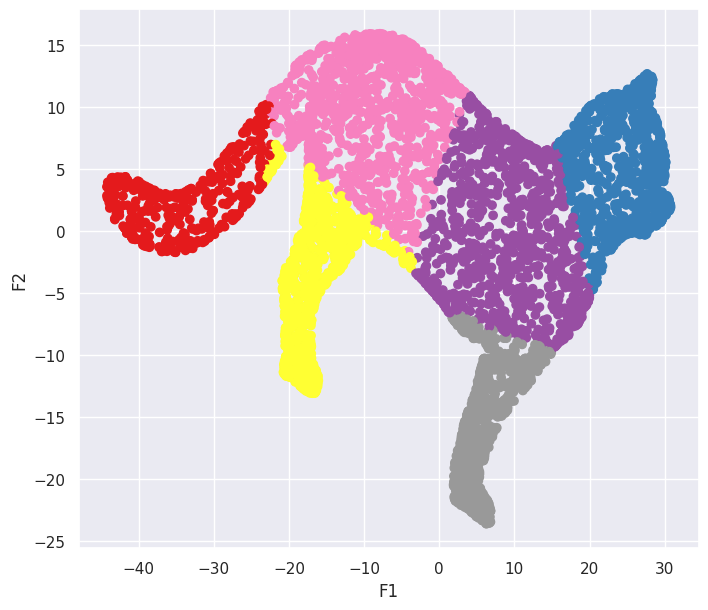

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_projected.iloc[:, 0], X_projected.iloc[:, 1], c= clusters, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Notre chat a retrouvé sa forme initiale et le k-means a bien identifiées 6 parties bien distinctes du chat :
* la tête
* les pattes avants et arrières
* la queue
* le corps divisé en deux parties


## 2.2 For 500 clusters

Comment faire maintenant, si nous voulions dessiner notre chat, mais non pas avec 5 000 points, mais seulement 500 points?

C'est ce que nous allons faire !

Commencons par définir 500 points, ou plutot 500 clusters :

In [31]:
n_clust = 500

In [35]:
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

km

KMeans(n_clusters=500)

In [39]:
clusters=km.labels_

clusters
clusters.shape
pd.Series.value_counts(clusters).sort_index()

,count
0,16
1,10
2,9
3,13
4,4
...,...
495,7
496,8
497,6
498,7


Appliquons notre PCA pour calculer nos points dans les nouveaux plans projectifs :

In [41]:
pca = PCA(n_components=3)
pca
pca.fit(X_scaled)
X_proj = pca.transform(X_scaled)
X_proj
X_projected = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])

X_projected

,PC1,PC2,PC3
0,2.166673,-20.747260,-5.031918
1,-17.286506,7.959952,-1.653664
2,-3.161626,14.597075,1.649365
3,21.375824,6.060292,5.238792
4,7.925629,-6.841428,-5.879043
...,...,...,...
4995,4.570074,-14.644788,2.341862
4996,-16.976683,8.486978,-3.716319
4997,-18.841304,-8.870381,-5.344156
4998,-3.429647,8.254321,-6.759923


Et affichons le tout :

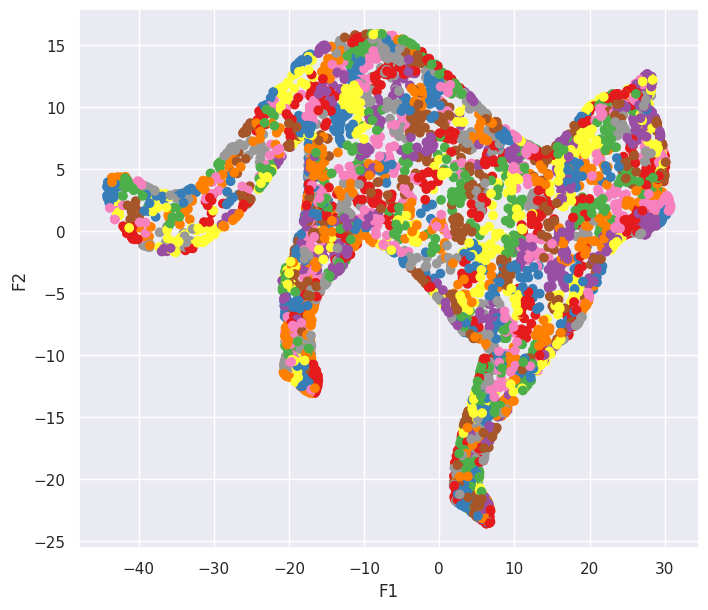

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_projected.iloc[:, 0], X_projected.iloc[:, 1], c= clusters, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Même si cela n'est pas très "visible", nous avons maintenant 500 groupes de points.

Il nous suffit de prendre le point au centre de chaque groupe, ou plutot de chaque cluster.

Ces points, ce sont précisement les centroides, et par chance, le k-means de scikit-learn nous permet de les calculer automatiquement grace à la méthode `cluster_centers_` :

In [44]:
centroids = km.cluster_centers_

centroids

array([[ -5.91001368,   1.76566108, -20.62521641],
       [ -3.5085796 ,  -5.30329644,  13.20559469],
       [ -4.73545364,  19.00099113,   9.98621117],
       ...,
       [  4.77432248,  -1.09719351,  12.62097287],
       [ -6.64522011,   5.98718463,  -5.36887467],
       [ -5.31878254,  -6.68668495,   8.46245404]])

On peut vérifier que nous avons bien 500 points et non 5 0000 :

In [45]:
centroids.shape

(500, 3)

Il ne nous reste plus qu'à projeter nos points :

In [47]:
centroids_projected = pca.transform(X_scaled)
centroids_projected = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])

centroids_projected[:10]

,PC1,PC2,PC3
0,2.166673,-20.747260,-5.031918
1,-17.286506,7.959952,-1.653664
2,-3.161626,14.597075,1.649365
3,21.375824,6.060292,5.238792
4,7.925629,-6.841428,-5.879043
5,-35.264140,2.782428,1.367944
6,-20.728658,-11.350690,3.955845
7,2.961991,-6.924647,3.170745
8,-2.228948,-3.741028,-2.093767
9,2.850039,8.541634,5.236558


Nous avons maintenant 500 lignes et 2 colonnes :

In [48]:
centroids_projected.shape

(5000, 3)

Et afficher le tout :

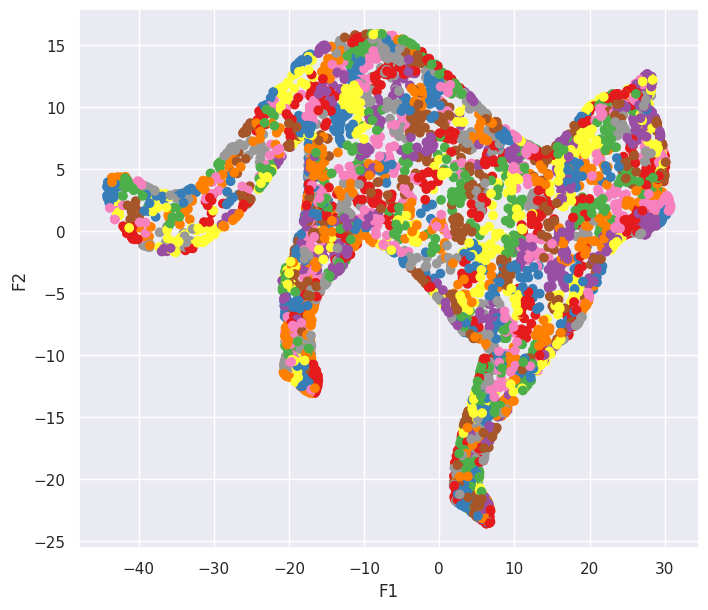

In [49]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(centroids_projected.iloc[:, 0], centroids_projected.iloc[:, 1], c= clusters, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Voila ! Notre chat n'est plus aussi *net* que tout à l'heure mais on le reconnait quand même.

Gros avantage, nous avons divisé la taille de nos données par 10 !

C'est un très bon exemple de réduction de dimension :)

# 3 Conclusion

Vous êtes arrivé au bout de ce travail, Bravo!

Il ne reste plus qu'à vous entrainer sur d'autres jeux de données 😀.

<br>

------------------

<br>

En cas de questions, n'hésitez pas à nous adresser vos questions, remarques ou suggestions sur le [formulaire](https://openclassrooms.zendesk.com/hc/fr/requests/new) .

